In [1]:
import pickle
import pandas as pd
pd.set_option('max_colwidth',100)
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
from textwrap import wrap
import math
import numpy as np

In [3]:
# Load in the files 
infile = open('data_files/comedian_corpus','rb')
data = pickle.load(infile)
infile.close()
data.head()

infile = open('data_files/comedian_dtm','rb')
dtm = pickle.load(infile)
infile.close()
dtm.head()

infile = open('data_files/stop_words','rb')
stop_words = pickle.load(infile)
infile.close()
data = data.drop(columns=['vocab_size','total_words','total_words_dtm','wpm_dtm','wpm'])

# Sentiment Analysis
To perform our sentiment analysis we'll be using TextBlob, which assigns polarity and subjectivity to our text using the words in our text and the order they come in. Therefore we need to use our corpus as it contains our text in full.

In [4]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['sketch_text'].apply(pol)
data['subjectivity'] = data['sketch_text'].apply(sub)


Text(0, 0.5, '<-- Facts -------- Opinions -->')

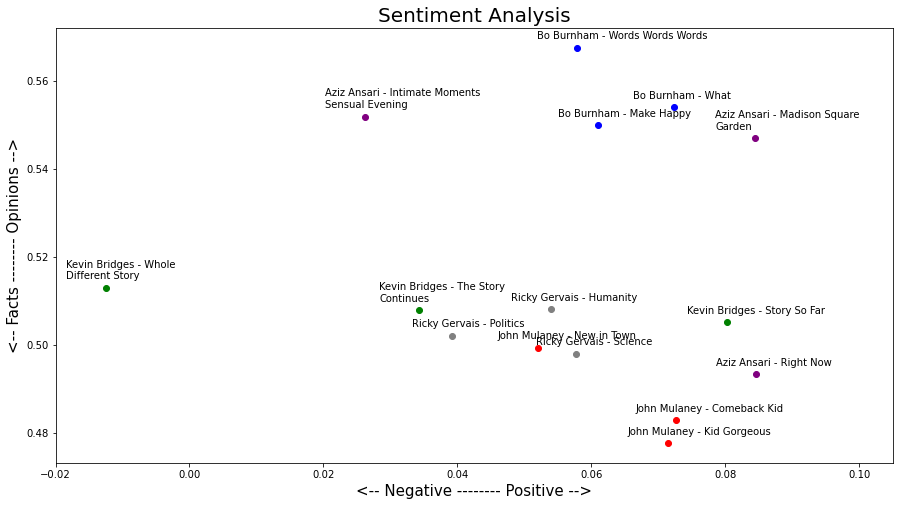

In [5]:
palette = ['Blue','Red','Green']
hue  = ['First Show','Second Show','Third Show']
show_labels = ['\n'.join(wrap(l,30)) for l in data.index] # wrap my show names so they fit in the graphs

plt.figure(figsize = (15,8))
color = ['Blue','Blue','Blue','Red','Red','Red','Grey','Grey','Grey','Green','Green','Green','Purple','Purple','Purple']
count = 0
for graph_iter in data.index:   
    x = data.polarity.loc[graph_iter]
    y = data.subjectivity.loc[graph_iter]
    plt.scatter(x, y, color=color[count])
    plt.text(x-0.006, y+.002, show_labels[count], fontsize=10)
    plt.xlim(-.02, .105)
    count +=1

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

We can see that our comedians sketches are slightly skewed towards being positive, but only just. The mean polarity of our sketches is 0.056.

To see if this is constant throughout the performance, we need to split the sketch texts into smaller chunks.

In [6]:
# Splits text into a list containing 10 equal chunks of text
def text_splitter(text, n=10):
    '''Splits a section of text into n chunks of words
        input: str (block of text), int (number of chunks of text to split into - defaults to 10)
        output: list (of the sections of text)'''
    word_list = text.split()
    length = len(word_list)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    out_list = []
    for chunk_iter in range(n-1):
        out_list.append(' '.join(word_list[start[chunk_iter]:start[chunk_iter]+size]))
    out_list.append(' '.join(word_list[start[n-1]:length]))
    return out_list

In [7]:
list_pieces = []
for index_iter in data.index:
    list_pieces.append(text_splitter(data.sketch_text[index_iter]))

In [8]:
# Our list has 15 elements, one for each performance. Each of those elements is a list containing the 10 sections of our show.
print(len(list_pieces))
print(len(list_pieces[0]))

15
10


In [9]:
polarity_scores = []
for lvl1_iter in list_pieces:
    lvl1_list = []
    for lvl2_iter in lvl1_iter:
        lvl1_list.append(TextBlob(lvl2_iter).sentiment.polarity)
    polarity_scores.append(lvl1_list)

# polarity_scores

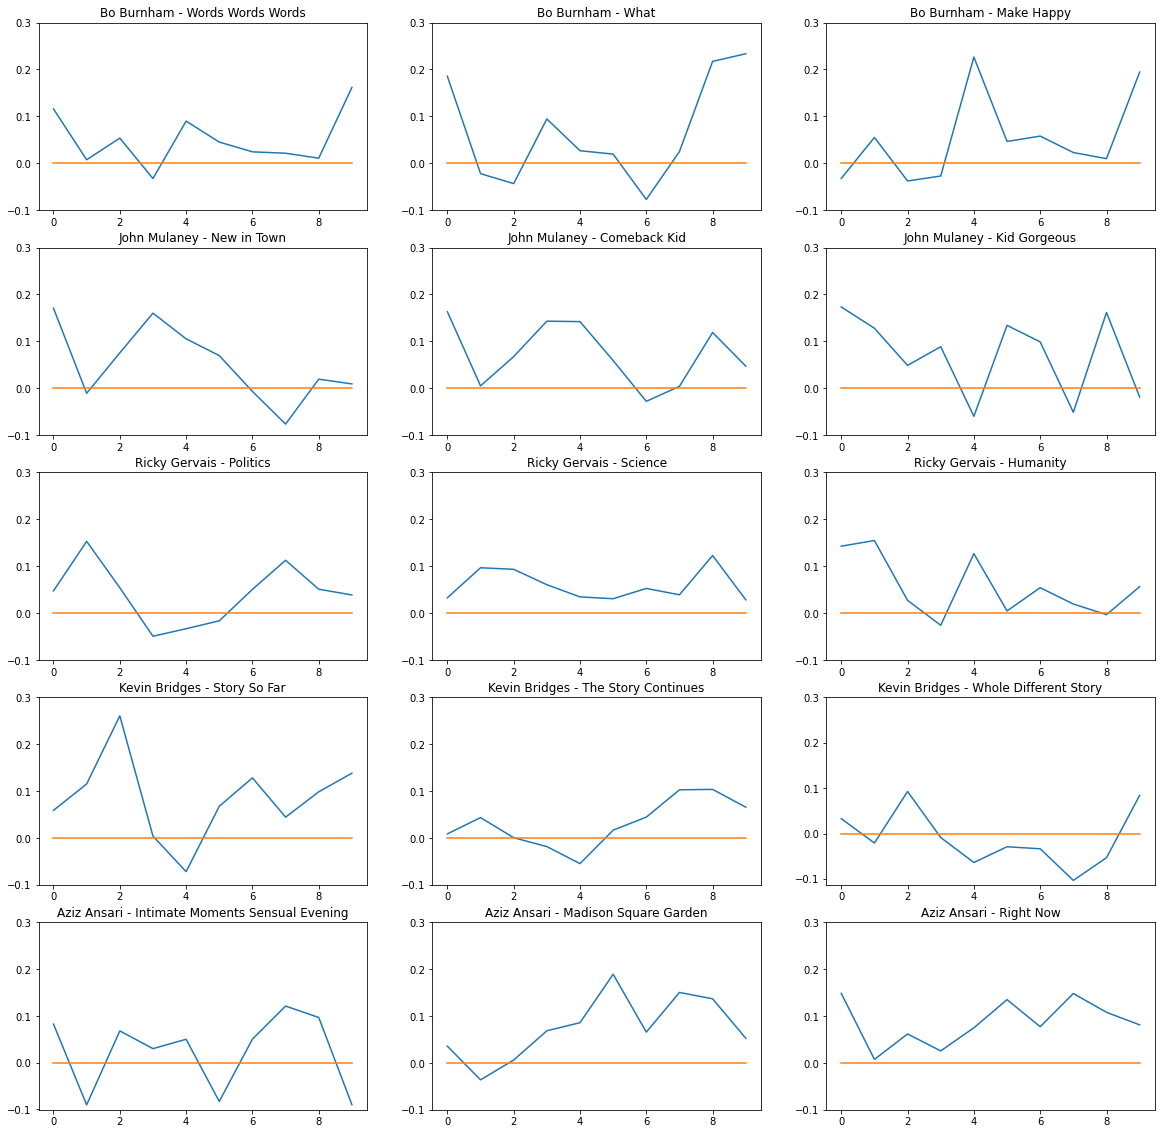

In [10]:
plt.figure(figsize = (20,20))
count = 0
for show in data.index:
    plt.subplot(5, 3, count + 1)
    sns.lineplot(x = np.arange(0,10), y = polarity_scores[count])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data.index[count])
    plt.yticks(np.arange(-0.1, 0.4, 0.1))
    count +=1